In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from joblib import Parallel, delayed

def plot_setup():
    plt.rcParams['text.usetex'] = False
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['ps.fonttype'] = 42
    plt.rcParams['mathtext.fontset'] = 'cm'
    # plt.rcParams['figure.autolayout'] = 'True'

    sns.set_style('ticks',{'axes.edgecolor': '[0,0,0]',
                           'xtick.direction':'in',
                           'ytick.direction':'in',
                           'ytick.right':'True',
                           'xtick.top':'True',
                           'xtick.color':'k',
                           'ytick.color':'k'
                            })

In [2]:
plot_setup()

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle 

def plot_setup():
    plt.rcParams['text.usetex'] = False
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['ps.fonttype'] = 42
    plt.rcParams['mathtext.fontset'] = 'cm'
    # plt.rcParams['figure.autolayout'] = 'True'

    sns.set_style('ticks',{'axes.edgecolor': '[0,0,0]',
                           'xtick.direction':'in',
                           'ytick.direction':'in',
                           'ytick.right':'True',
                           'xtick.top':'True',
                           'xtick.color':'k',
                           'ytick.color':'k'
                            })

def gammafunc(size,mu,diff_flag):
    if diff_flag == 1:
        return 6*np.pi*mu*0.005*size
    else:
        return 6*np.pi*mu*0.005*3
    
def diffusion(size,sigma,mu,diff_flag):
    gamma_m = 6*np.pi*0.3*0.01
    gamma = gammafunc(size,mu,diff_flag)
    return ((sigma/(gamma_m+gamma))**2)/2

def diffusion_fluid_drag(size,sigma,mu):
    gamma_m = 6*np.pi*0.3*0.01
    gamma = gammafunc(size,mu,diff_flag)
    return ((sigma/(gamma_m+gamma))**2)/2

def velocity_fluid_drag(size,mu):
    a = 0.005*size
    gamma_m = 6*np.pi*0.3*0.01
    return (6*np.pi*mu*a)/(gamma_m + 6*np.pi*mu*a)


In [4]:
models = [1,2,3,4]
M = 10

with open('data/Fig3_Data.pkl','rb') as f:
    out = pickle.load(f)

with open('data/Fig3_ParamSets.pkl','rb') as f:
    paramSets = pickle.load(f)
models = [1,2,3,4]
pars = [(*p,mod) for p in paramSets for mod in models]


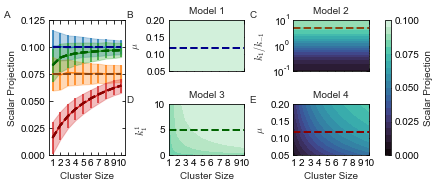

In [5]:
paramSets = np.array(paramSets)
#param order:  mu,sigma,kon,kon1
mu = paramSets[:,0]
sigma = paramSets[0,1]
kon = paramSets[:,2]
kon1 = paramSets[:,3]
koff = 1

pe, sp, velos, size, disp, state = zip(*out)
pars_arr = np.array(pars)
colors = ['C0','C1','C2','C3']

M = 10
x = np.arange(1,M+1)

fig, axs = plt.subplots(2,3,figsize=(6,2.5), constrained_layout = True, sharex = True)
gs = axs[0,0].get_gridspec()
for ax in axs[:,0]:
    ax.remove()

axbig = fig.add_subplot(gs[:,0])

ax = axbig

for i in range(len(models)):
    mod = models[i]
    idx = (pars_arr[:,-1]==mod)
    
    Yavg = np.empty(M)
    Ystd = np.empty_like(Yavg)
    Ynum = np.shape(pars_arr[idx,:])[0]
    
    Y = np.array(sp)
    for j in range(M):
        Yavg[j] = np.mean(Y[idx,:,j].ravel())
        Ystd[j] = np.std(Y[idx,:,j].ravel())

    ax.fill_between(x = x,
                    y1 = Yavg - Ystd/np.sqrt(Ynum),
                    y2 = Yavg + Ystd/np.sqrt(Ynum),
                    alpha = 0.3,
                    color=colors[i])
    ax.errorbar(x = x,
                y = Yavg,
                yerr = Ystd/np.sqrt(Ynum),
                color=colors[i],
                label=str(mod))
    ax.set_xticks(np.arange(1,M+1))
    ax.set_xlabel('Cluster Size')
    ax.set_ylabel('Scalar Projection')
    ax.set_ylim((0,0.125))
    ax.set_yticks(np.linspace(0,0.125,6))
    
    m3sp = np.empty(10)
    m4sp = np.empty(10)

    for i in range(len(x)):
        m3sp[i] = np.mean(0.1*(5+kon1*(x[i]-1))/(5+kon1*(x[i]-1)+koff))
        m4sp[i] = np.mean(0.1*velocity_fluid_drag(x[i],mu))

    ax.plot(x,m3sp,color='darkgreen',ls='--',lw=2,zorder=10)
    ax.plot(x,m4sp,color='darkred',ls='--',lw=2,zorder=10)
    ax.plot(x,0.1*np.ones(np.shape(x)),color='darkblue',ls='--',lw=2,zorder=10)
    ax.plot(x,0.1*np.ones(np.shape(x))*np.mean(kon/(kon+koff)),color='saddlebrown',lw=2,ls='--',zorder=10)
    
    
num_cells = 25
sigma = 0.01 #noise level
mu_range = np.linspace(0.05,0.2,num_cells) #drag 
kon_range = np.linspace(0.1,10,num_cells) #kon binding to cortex
koff_range = np.ones(num_cells) #koff unbinding 
kon1_range = np.linspace(0,10,num_cells)


num_levels = 21
axes = axs[:,1:]
ax = axes[0,0]
xx,yy = np.meshgrid(x,mu_range)
b = ax.contourf(xx,yy,0.1*np.ones(np.shape(xx)),cmap=sns.color_palette("mako", as_cmap=True),levels=np.linspace(0,0.1,num_levels))
ax.set_ylabel('$\mu$')
ax.set_ylim((mu_range[0],mu_range[-1]))
ax.set_yticks(mu_range[::8])
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.set_title('Model 1', fontsize=10)
ax.axhline(y=np.mean(mu),ls='--',lw=2,color='darkblue')

ax = axes[0,1]
xx,yy = np.meshgrid(x,kon_range)
ax.set_ylabel('$k_{1}/k_{-1}$')
ax.set_xticks(x)
ax.set_ylim((kon_range[0],kon_range[-1]))
ax.set_yticks((kon_range[0],kon_range[-1]))
ax.set_yscale('log')
ax.set_title('Model 2', fontsize=10)
c = ax.contourf(xx,yy,0.1*yy/(yy+1),cmap=sns.color_palette("mako", as_cmap=True),levels=np.linspace(0,0.1,num_levels))
ax.axhline(y=np.mean(kon),ls='--',lw=2,color='saddlebrown')

ax = axes[1,0]
xx,yy = np.meshgrid(x,kon1_range)
ax.set_xlabel('Cluster Size')
ax.set_ylabel('$k_{1}^1$')
ax.set_xticks(x)
ax.set_ylim((kon1_range[0],kon1_range[-1]))
ax.set_title('Model 3', fontsize=10)
d = ax.contourf(xx,yy,0.1*(5+(xx-1)*yy)/(5+(xx-1)*yy+1),cmap=sns.color_palette("mako", as_cmap=True),levels=np.linspace(0,0.1,num_levels))
ax.axhline(y=np.mean(kon1),ls='--',lw=2,color='darkgreen')


ax = axes[1,1]
xx,yy = np.meshgrid(x,mu_range)
ax.set_xlabel('Cluster Size')
ax.set_ylabel('$\mu$')
ax.set_xticks(x)
ax.set_ylim((mu_range[0],mu_range[-1]))
ax.set_yticks(mu_range[::8])
ax.set_title('Model 4', fontsize=10)
e = ax.contourf(xx,yy,0.1*velocity_fluid_drag(xx,yy),cmap=sns.color_palette("mako", as_cmap=True),levels=np.linspace(0,0.1,num_levels))
ax.axhline(y=np.mean(mu),ls='--',lw=2,color='darkred')

cbar = fig.colorbar(b, ax=axes, shrink=1)
cbar.ax.set_ylabel('Scalar Projection')
cbar.set_ticks(np.linspace(0,0.1,num_levels)[::5])

fig.canvas.draw()
bboxB = axes[0,0].get_tightbbox(fig.canvas.get_renderer())
fig.text(bboxB.x0, bboxB.y1, 'B', transform=None,va='top')
bboxC = axes[0,1].get_tightbbox(fig.canvas.get_renderer())
fig.text(bboxC.x0, bboxC.y1, 'C', transform=None,va='top')

bboxD = axes[1,0].get_tightbbox(fig.canvas.get_renderer())
fig.text(bboxB.x0, bboxD.y1, 'D', transform=None,va='top')

fig.text(bboxC.x0, bboxD.y1, 'E', transform=None,va='top')

bboxA = axbig.get_tightbbox(fig.canvas.get_renderer())
fig.text(bboxA.x0, bboxB.y1, 'A', transform=None,va='top')
fig.savefig('figures/Fig5.pdf',format='pdf')